In [1]:
import os
import re
import cv2
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F # <-- Added import
# from tqdm import tqdm # Removed, not used in inference
import albumentations as A
# import torch.optim as optim # Removed, not needed for inference
# import matplotlib.pyplot as plt # Removed, not used in inference
# from Generator import Generator # Removed old generator
# from utils import load_checkpoint # Removed old loading util
from torch.utils.data import DataLoader
from albumentations.pytorch import ToTensorV2
from PIL import Image, ImageDraw, ImageFont, features
import gensim.models.fasttext # <-- Added for FastText

from generator import *
from utils import *

c:\Users\devbh\AppData\Local\Programs\Python\Python311\Lib\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {DEVICE}")

# --- Configuration ---
FASTTEXT_DIM = 300
NOISE_DIM = 128            # Dimension of the noise vector
NGF = 256                   # Base number of generator filters
LABEL_NC_G = 256            # Number of channels for SPADE conditioning map
ADD_ATTENTION_G = True      # Use attention in G (must match saved model)
INPUT_CHANNELS = 1         # Grayscale input
OUTPUT_CHANNELS = 1        # Grayscale output

GENERATOR_MODEL_PATH = "../../Model_Training/Models/generator_epoch_102.pth" # Example path
MODEL_PATH = "../../Model_Training/Models/cc.hi.300.bin" # Make sure this file is accessible



Using device: cuda


In [3]:
print("Loading Generator model...")
gen = UNetStyleGenerator(
    fasttext_dim=FASTTEXT_DIM,
    noise_dim=NOISE_DIM,
    input_channels=INPUT_CHANNELS,
    output_channels=OUTPUT_CHANNELS,
    ngf=NGF,
    label_nc=LABEL_NC_G,
    add_attention=ADD_ATTENTION_G
)

state_dict = torch.load(os.path.normpath(GENERATOR_MODEL_PATH), map_location=DEVICE)
gen.load_state_dict(state_dict)
gen.to(DEVICE) # Move model to device
gen.eval()
print("Loaded Generator model...")
print("Loading FastText model...")
model = gensim.models.fasttext.load_facebook_model(MODEL_PATH)
print("Loaded FastText model...")

Loading Generator model...


C:\Users\devbh\AppData\Local\Temp\ipykernel_29676\2177428055.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(os.path.normpath(GENERATOR_MODEL_PA

Loaded Generator model...
Loading FastText model...
Loaded FastText model...


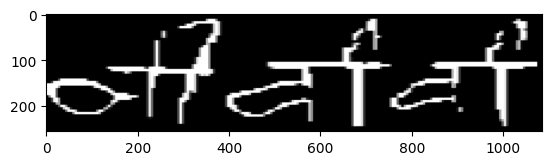

In [4]:
word = getWordImage("खनिज", gen, model, DEVICE)
plt.imshow(word, cmap="gray")

Error inputs 'उद्योग': list index out of range. Skip.
Error inputs 'उद्योग': list index out of range. Skip.
Error inputs 'मुद्रक': list index out of range. Skip.
Error inputs 'पाँच': list index out of range. Skip.
Error inputs 'सदियों': list index out of range. Skip.
Error inputs 'बल्कि': list index out of range. Skip.
Error inputs 'इलेक्ट्रॉनिक': list index out of range. Skip.
Error inputs 'में': list index out of range. Skip.
Error inputs 'छलांग': list index out of range. Skip.
Error inputs 'अपरिवर्तित': list index out of range. Skip.
Error inputs 'में': list index out of range. Skip.
Error inputs 'लोकप्रिय': list index out of range. Skip.
Error inputs 'में': list index out of range. Skip.
Error inputs 'संस्करणों': list index out of range. Skip.
Error inputs 'डेस्कटॉप': list index out of range. Skip.
Error inputs 'प्रकाशन': list index out of range. Skip.
Error inputs 'सॉफ्टवेयर': list index out of range. Skip.
Error inputs 'प्रचलित': list index out of range. Skip.


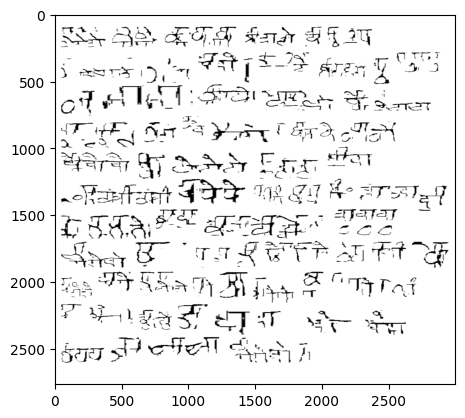

In [5]:
plt.imshow(np.asarray(place_words_on_canvas(font_size=200 ,sentence="छपाई और अक्षर योजन उद्योग का एक साधारण डमी पाठ है. Lorem Ipsum सन १५०० के बाद से अभी तक इस उद्योग का मानक डमी पाठ मन गया, जब एक अज्ञात मुद्रक ने नमूना लेकर एक नमूना किताब बनाई. यह न केवल पाँच सदियों से जीवित रहा बल्कि इसने इलेक्ट्रॉनिक मीडिया में छलांग लगाने के बाद भी मूलतः अपरिवर्तित रहा. यह 1960 के दशक में Letraset Lorem Ipsum अंश युक्त पत्र के रिलीज के साथ लोकप्रिय हुआ, और हाल ही में Aldus PageMaker Lorem Ipsum के संस्करणों सहित तरह डेस्कटॉप प्रकाशन सॉफ्टवेयर के साथ अधिक प्रचलित हुआ", canvas_width=3000, gen=gen, model=model, DEVICE=DEVICE)), cmap="gray")